# GoEmotions Multi-Label Sentiment Classification - Comprehensive EDA
## Exploratory Data Analysis for Thesis Presentation

**Dataset**: GoEmotions by Google Research  
**Task**: Multi-label emotion classification  
**Labels**: 28 emotion categories (27 emotions + neutral)

---

## 1. Setup & Data Loading

In [ ]:
# Install required packages
!pip install datasets pandas numpy matplotlib seaborn plotly wordcloud scikit-learn -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datasets import load_dataset
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [ ]:
# Load GoEmotions dataset
print("Loading GoEmotions dataset...")
ds = load_dataset("google-research-datasets/go_emotions", "simplified")

print(f"\n📊 Dataset Splits:")
print(f"  - Training: {len(ds['train']):,} samples")
print(f"  - Validation: {len(ds['validation']):,} samples")
print(f"  - Test: {len(ds['test']):,} samples")
print(f"  - Total: {len(ds['train']) + len(ds['validation']) + len(ds['test']):,} samples")

Loading GoEmotions dataset...


README.md: 0.00B [00:00, ?B/s]

simplified/train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

simplified/validation-00000-of-00001.par(…):   0%|          | 0.00/350k [00:00<?, ?B/s]

simplified/test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]


📊 Dataset Splits:
  - Training: 43,410 samples
  - Validation: 5,426 samples
  - Test: 5,427 samples
  - Total: 54,263 samples


In [ ]:
# Convert to pandas for easier manipulation
train_df = pd.DataFrame(ds['train'])
val_df = pd.DataFrame(ds['validation'])
test_df = pd.DataFrame(ds['test'])

# Display first few samples
print("\n🔍 First 5 training samples:")
train_df.head()


🔍 First 5 training samples:


,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [ ]:
# Define emotion labels (28 emotions including neutral)
EMOTION_LABELS = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
    'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
    'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness',
    'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

print(f"\n🏷️  Total Emotion Labels: {len(EMOTION_LABELS)}")
print(f"\nEmotion Categories:\n{', '.join(EMOTION_LABELS)}")


🏷️  Total Emotion Labels: 28

Emotion Categories:
admiration, amusement, anger, annoyance, approval, caring, confusion, curiosity, desire, disappointment, disapproval, disgust, embarrassment, excitement, fear, gratitude, grief, joy, love, nervousness, optimism, pride, realization, relief, remorse, sadness, surprise, neutral


---
## 2. Dataset Overview & Basic Statistics

In [ ]:
# Basic dataset information
print("📋 Dataset Structure:")
print(f"\nColumns: {train_df.columns.tolist()}")
print(f"\nData Types:\n{train_df.dtypes}")
print(f"\nMissing Values:\n{train_df.isnull().sum()}")
print(f"\nDataset Info:")
train_df.info()

📋 Dataset Structure:

Columns: ['text', 'labels', 'id']

Data Types:
text      object
labels    object
id        object
dtype: object

Missing Values:
text      0
labels    0
id        0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    43410 non-null  object
 1   labels  43410 non-null  object
 2   id      43410 non-null  object
dtypes: object(3)
memory usage: 1017.6+ KB


In [ ]:
# Text length statistics
train_df['text_length'] = train_df['text'].str.len()
train_df['word_count'] = train_df['text'].str.split().str.len()

print("📏 Text Length Statistics:")
print(f"\nCharacter Length:")
print(train_df['text_length'].describe())
print(f"\nWord Count:")
print(train_df['word_count'].describe())

📏 Text Length Statistics:

Character Length:
count    43410.000000
mean        68.400875
std         36.721898
min          2.000000
25%         38.000000
50%         65.000000
75%         96.000000
max        703.000000
Name: text_length, dtype: float64

Word Count:
count    43410.000000
mean        12.840175
std          6.701597
min          1.000000
25%          7.000000
50%         12.000000
75%         18.000000
max         33.000000
Name: word_count, dtype: float64


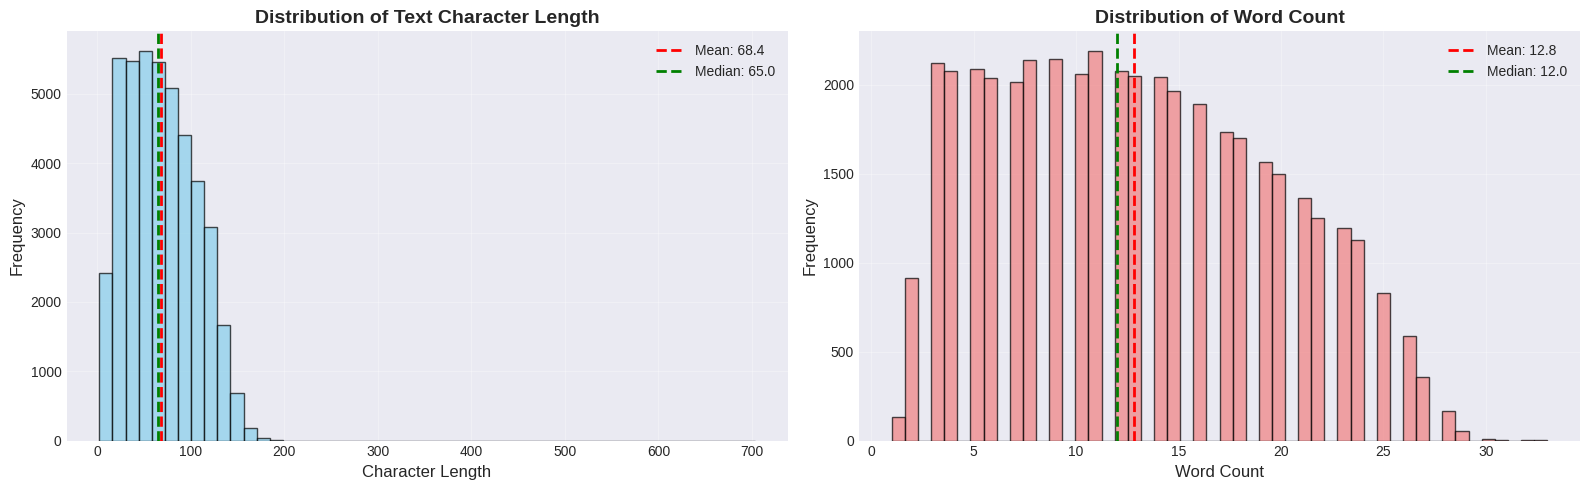

In [ ]:
# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Character length distribution
axes[0].hist(train_df['text_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {train_df['text_length'].mean():.1f}")
axes[0].axvline(train_df['text_length'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {train_df['text_length'].median():.1f}")
axes[0].set_xlabel('Character Length', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Text Character Length', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Word count distribution
axes[1].hist(train_df['word_count'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].axvline(train_df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {train_df['word_count'].mean():.1f}")
axes[1].axvline(train_df['word_count'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {train_df['word_count'].median():.1f}")
axes[1].set_xlabel('Word Count', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Word Count', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## 3. Multi-Label Analysis

In [ ]:
# Analyze number of labels per sample
train_df['num_labels'] = train_df['labels'].apply(len)

print("🏷️  Multi-Label Statistics:")
print(f"\nLabels per Sample:")
print(train_df['num_labels'].describe())
print(f"\nLabel Distribution:")
print(train_df['num_labels'].value_counts().sort_index())

🏷️  Multi-Label Statistics:

Labels per Sample:
count    43410.000000
mean         1.177217
std          0.417699
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: num_labels, dtype: float64

Label Distribution:
num_labels
1    36308
2     6541
3      532
4       28
5        1
Name: count, dtype: int64


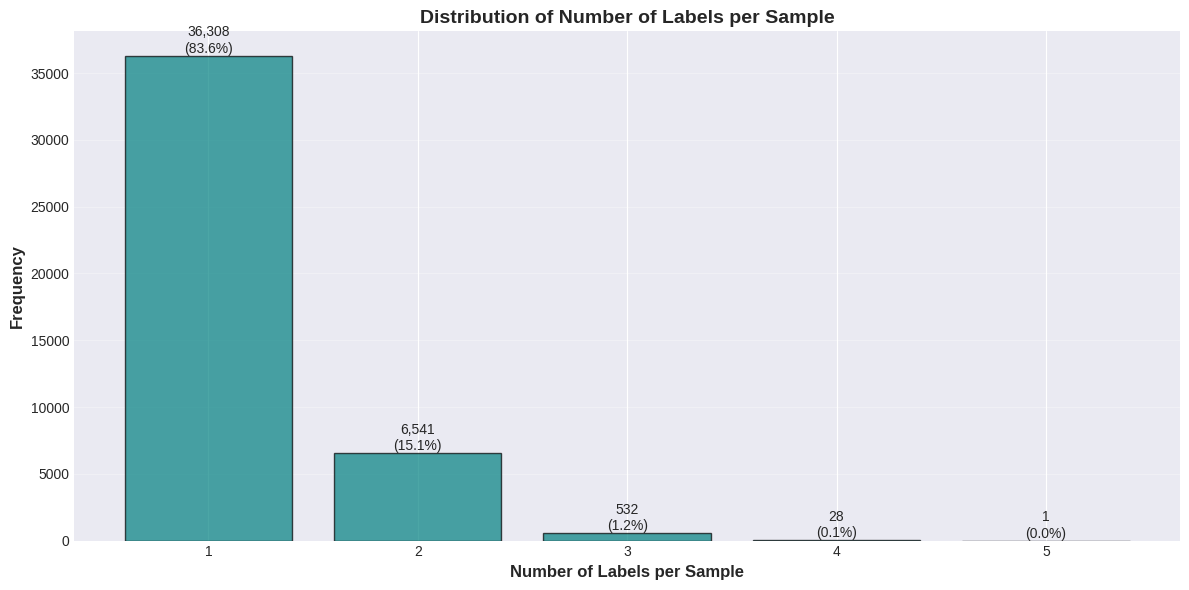


📊 Key Insights:
  - Single-label samples: 83.64%
  - Multi-label samples: 16.36%
  - Maximum labels per sample: 5


In [ ]:
# Visualize multi-label distribution
label_counts = train_df['num_labels'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(label_counts.index, label_counts.values, color='teal', alpha=0.7, edgecolor='black')

# Add percentage labels on bars
total = len(train_df)
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Number of Labels per Sample', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Number of Labels per Sample', fontsize=14, fontweight='bold')
ax.set_xticks(label_counts.index)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print insights
single_label_pct = (train_df['num_labels'] == 1).sum() / len(train_df) * 100
multi_label_pct = (train_df['num_labels'] > 1).sum() / len(train_df) * 100
print(f"\n📊 Key Insights:")
print(f"  - Single-label samples: {single_label_pct:.2f}%")
print(f"  - Multi-label samples: {multi_label_pct:.2f}%")
print(f"  - Maximum labels per sample: {train_df['num_labels'].max()}")

---
## 4. Emotion Label Distribution

In [ ]:
# Count frequency of each emotion
emotion_counts = Counter()
for labels in train_df['labels']:
    for label in labels:
        emotion_counts[EMOTION_LABELS[label]] += 1

# Convert to dataframe and sort
emotion_df = pd.DataFrame(emotion_counts.items(), columns=['Emotion', 'Count'])
emotion_df = emotion_df.sort_values('Count', ascending=False).reset_index(drop=True)
emotion_df['Percentage'] = (emotion_df['Count'] / len(train_df) * 100).round(2)

print("\n📊 Emotion Label Frequencies:")
print(emotion_df.to_string(index=False))


📊 Emotion Label Frequencies:
       Emotion  Count  Percentage
       neutral  14219       32.76
    admiration   4130        9.51
      approval   2939        6.77
     gratitude   2662        6.13
     annoyance   2470        5.69
     amusement   2328        5.36
     curiosity   2191        5.05
          love   2086        4.81
   disapproval   2022        4.66
      optimism   1581        3.64
         anger   1567        3.61
           joy   1452        3.34
     confusion   1368        3.15
       sadness   1326        3.05
disappointment   1269        2.92
   realization   1110        2.56
        caring   1087        2.50
      surprise   1060        2.44
    excitement    853        1.96
       disgust    793        1.83
        desire    641        1.48
          fear    596        1.37
       remorse    545        1.26
 embarrassment    303        0.70
   nervousness    164        0.38
        relief    153        0.35
         pride    111        0.26
         grief    

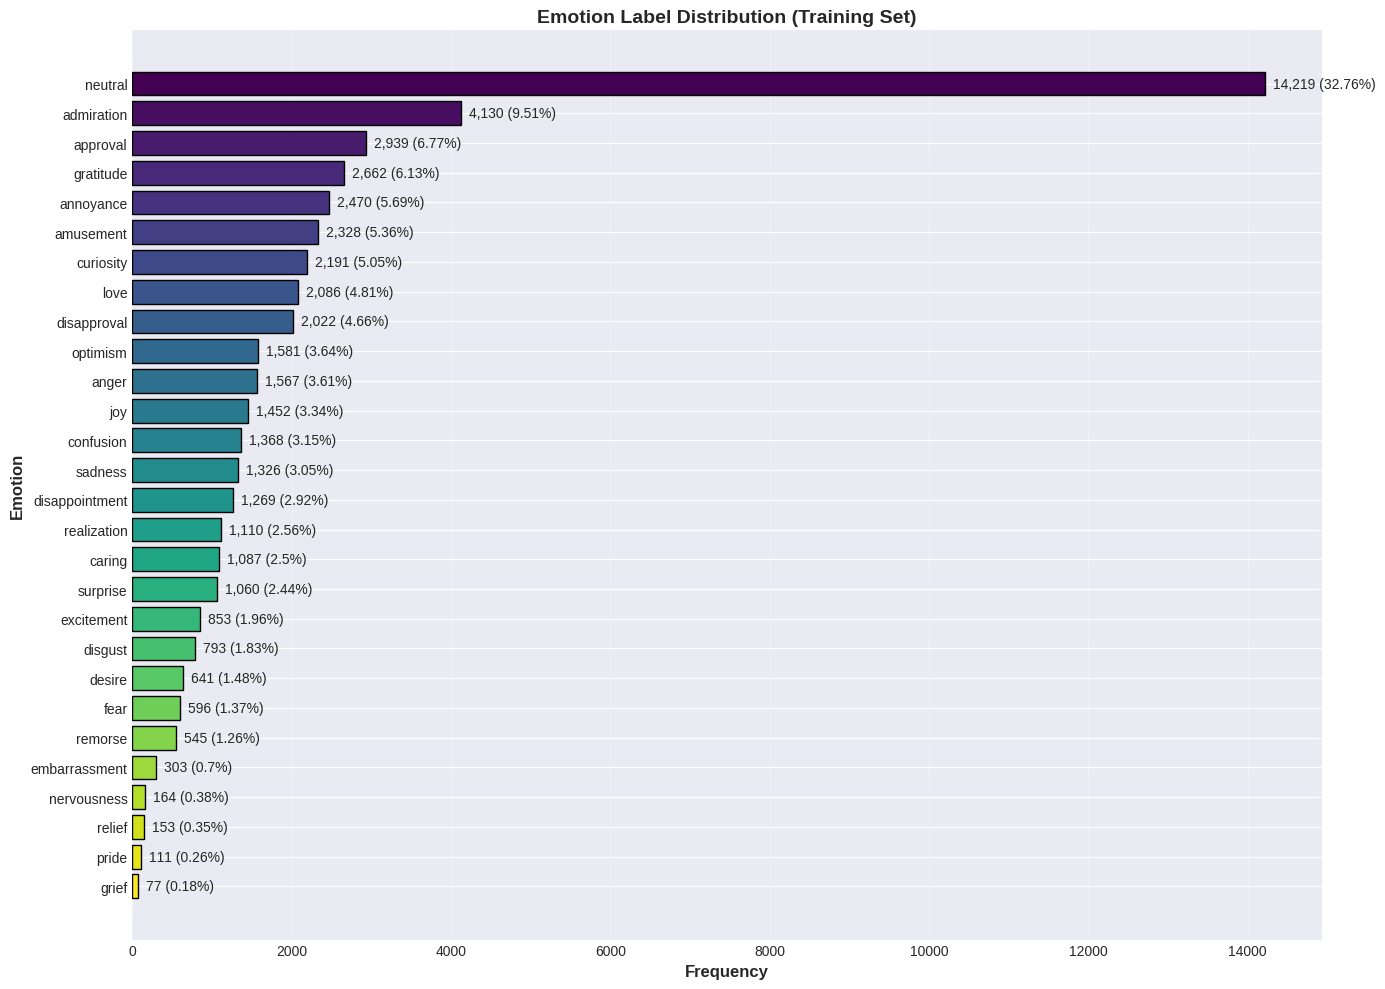

In [ ]:
# Visualize emotion distribution with horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))

colors = plt.cm.viridis(np.linspace(0, 1, len(emotion_df)))
bars = ax.barh(emotion_df['Emotion'], emotion_df['Count'], color=colors, edgecolor='black')

# Add count labels
for i, (count, pct) in enumerate(zip(emotion_df['Count'], emotion_df['Percentage'])):
    ax.text(count + 100, i, f'{count:,} ({pct}%)', va='center', fontsize=10)

ax.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax.set_ylabel('Emotion', fontsize=12, fontweight='bold')
ax.set_title('Emotion Label Distribution (Training Set)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# Interactive pie chart for top emotions
fig = px.pie(emotion_df,
             values='Count',
             names='Emotion',
             title='Emotions Distribution',
             hole=0.4,
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=600)
fig.show()

In [ ]:
# Class imbalance analysis
max_count = emotion_df['Count'].max()
min_count = emotion_df['Count'].min()
imbalance_ratio = max_count / min_count

print(f"\n⚖️  Class Imbalance Analysis:")
print(f"  - Most frequent emotion: {emotion_df.iloc[0]['Emotion']} ({emotion_df.iloc[0]['Count']:,} samples)")
print(f"  - Least frequent emotion: {emotion_df.iloc[-1]['Emotion']} ({emotion_df.iloc[-1]['Count']:,} samples)")
print(f"  - Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"\n  ⚠️  High class imbalance detected - consider techniques like:")
print(f"      • Class weighting")
print(f"      • Focal loss")
print(f"      • Resampling strategies")


⚖️  Class Imbalance Analysis:
  - Most frequent emotion: neutral (14,219 samples)
  - Least frequent emotion: grief (77 samples)
  - Imbalance Ratio: 184.66:1

  ⚠️  High class imbalance detected - consider techniques like:
      • Class weighting
      • Focal loss
      • Resampling strategies


---
## 5. Label Co-occurrence Analysis

In [ ]:
# Create co-occurrence matrix
n_labels = len(EMOTION_LABELS)
cooccurrence_matrix = np.zeros((n_labels, n_labels))

for labels in train_df['labels']:
    for i in labels:
        for j in labels:
            if i != j:
                cooccurrence_matrix[i][j] += 1

# Convert to dataframe
cooccurrence_df = pd.DataFrame(cooccurrence_matrix,
                               index=EMOTION_LABELS,
                               columns=EMOTION_LABELS)

print("✅ Co-occurrence matrix created")

✅ Co-occurrence matrix created


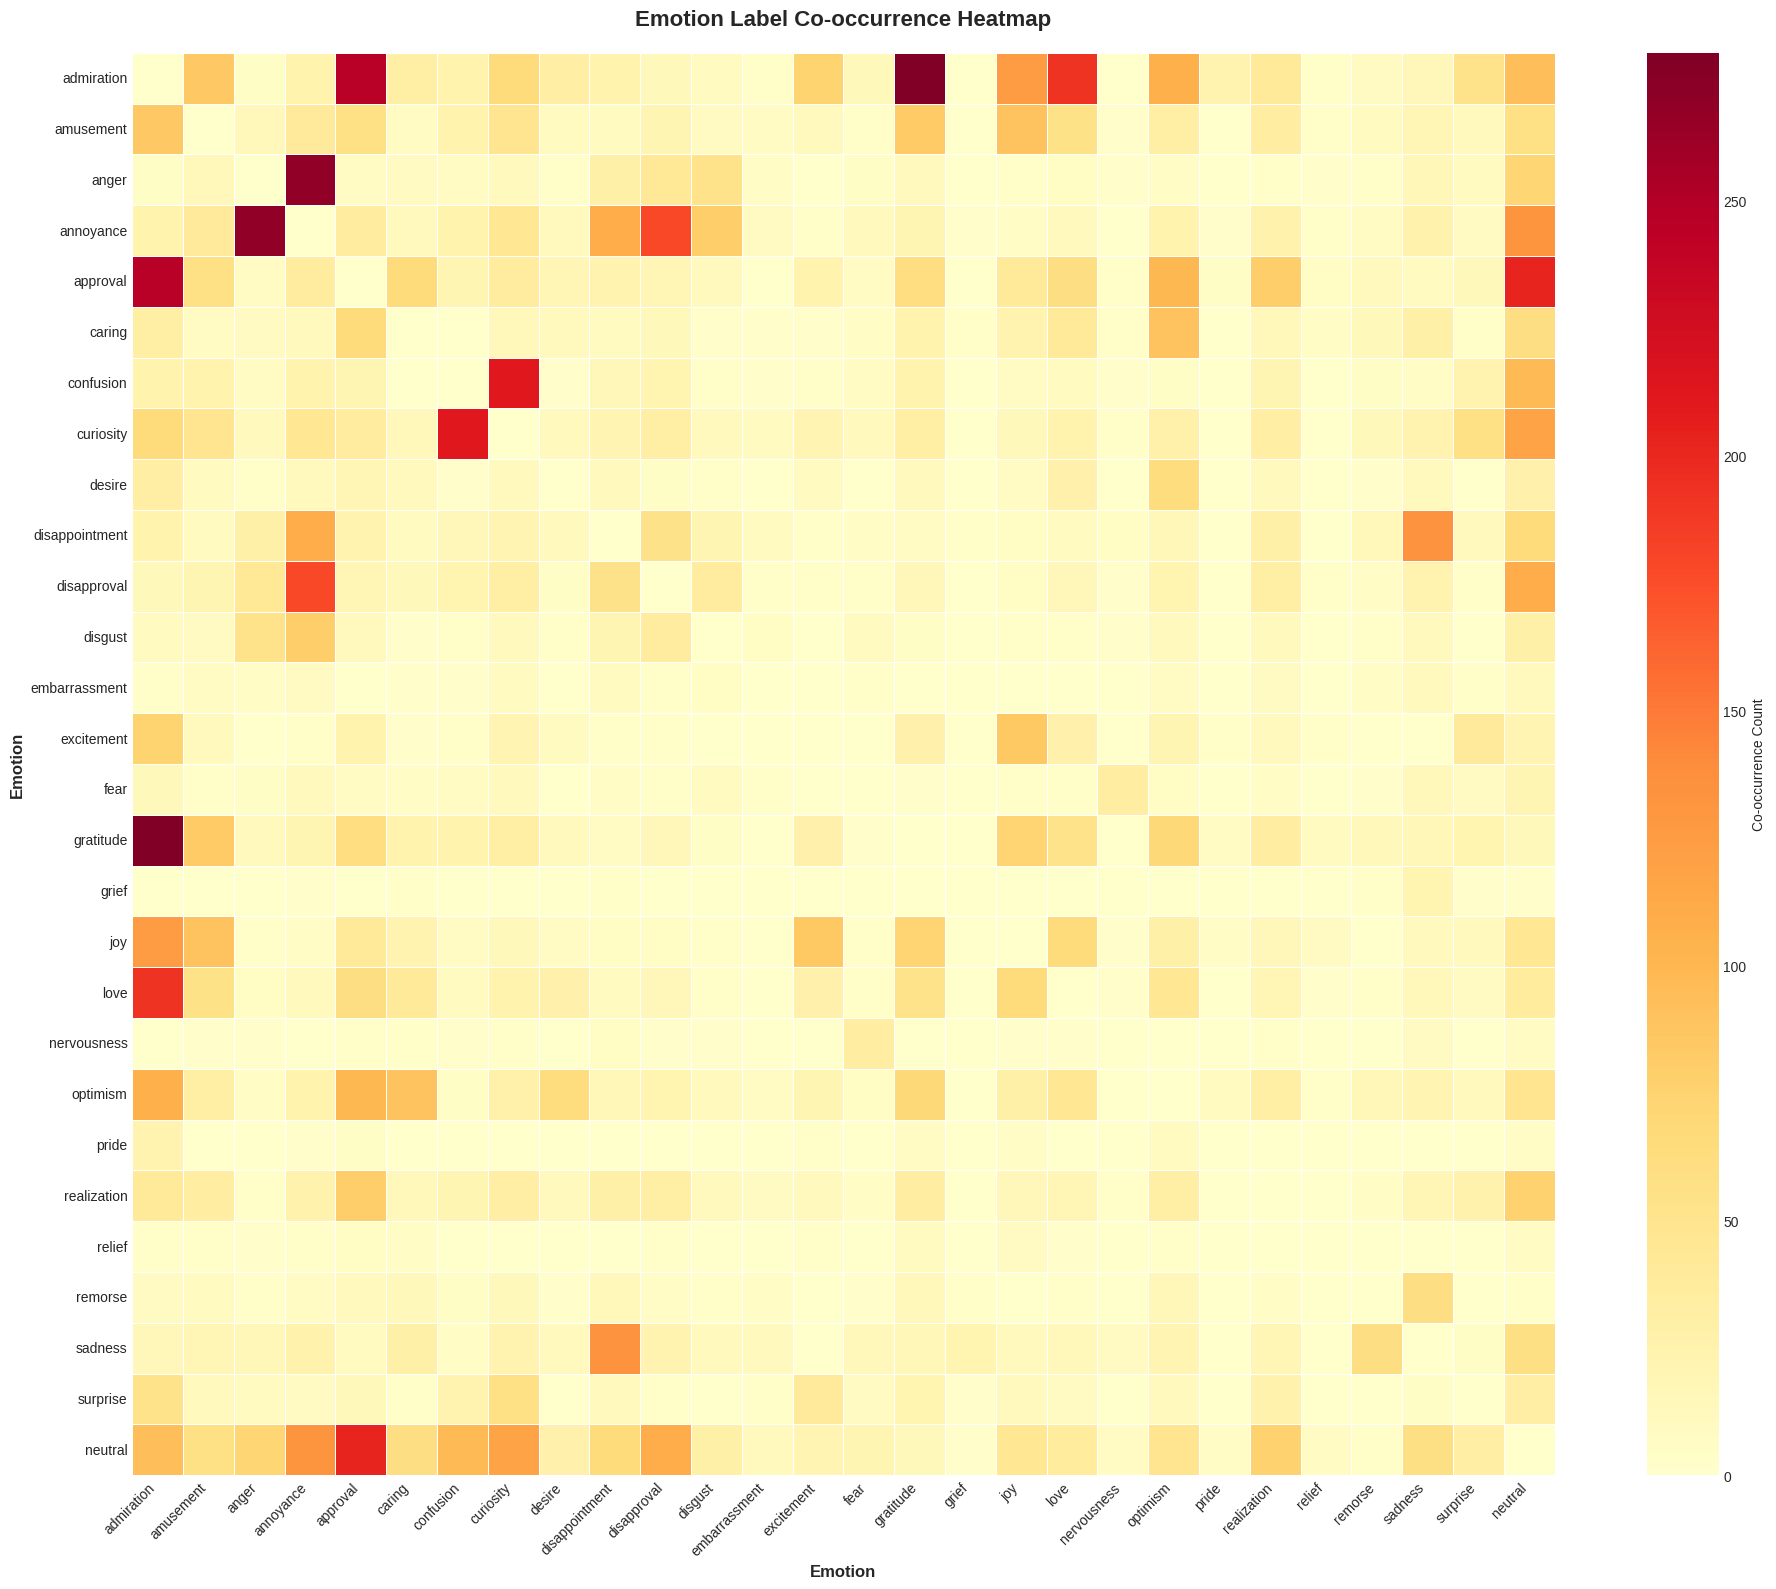

In [ ]:
# Visualize co-occurrence heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(cooccurrence_df,
            annot=False,
            cmap='YlOrRd',
            square=True,
            cbar_kws={'label': 'Co-occurrence Count'},
            linewidths=0.5,
            linecolor='white')

plt.title('Emotion Label Co-occurrence Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Emotion', fontsize=12, fontweight='bold')
plt.ylabel('Emotion', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Find top co-occurring emotion pairs
cooccurrence_pairs = []
for i in range(n_labels):
    for j in range(i+1, n_labels):
        if cooccurrence_matrix[i][j] > 0:
            cooccurrence_pairs.append({
                'Emotion 1': EMOTION_LABELS[i],
                'Emotion 2': EMOTION_LABELS[j],
                'Count': int(cooccurrence_matrix[i][j])
            })

cooccurrence_pairs_df = pd.DataFrame(cooccurrence_pairs)
cooccurrence_pairs_df = cooccurrence_pairs_df.sort_values('Count', ascending=False).reset_index(drop=True)

print("\n🔗 Top 20 Co-occurring Emotion Pairs:")
print(cooccurrence_pairs_df.head(20).to_string(index=False))


🔗 Top 20 Co-occurring Emotion Pairs:
     Emotion 1      Emotion 2  Count
    admiration      gratitude    279
         anger      annoyance    269
    admiration       approval    246
     confusion      curiosity    212
      approval        neutral    202
    admiration           love    192
     annoyance    disapproval    178
disappointment        sadness    133
     annoyance        neutral    132
    admiration            joy    126
     curiosity        neutral    118
     annoyance disappointment    110
   disapproval        neutral    109
    admiration       optimism    106
      approval       optimism    100
     confusion        neutral     98
    admiration        neutral     94
     amusement            joy     90
        caring       optimism     90
    excitement            joy     86


In [ ]:
# Visualize top co-occurring pairs
top_pairs = cooccurrence_pairs_df.head(15).copy()
top_pairs['Pair'] = top_pairs['Emotion 1'] + ' + ' + top_pairs['Emotion 2']

fig = px.bar(top_pairs,
             x='Count',
             y='Pair',
             orientation='h',
             title='Top 15 Co-occurring Emotion Pairs',
             color='Count',
             color_continuous_scale='Blues')

fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=600)
fig.show()

---
## 6. Text Analysis & Sample Exploration

In [ ]:
# Show sample texts for each emotion
def get_emotion_samples(emotion_name, n_samples=3):
    emotion_idx = EMOTION_LABELS.index(emotion_name)
    samples = train_df[train_df['labels'].apply(lambda x: emotion_idx in x)].sample(n=min(n_samples, 3))
    return samples['text'].tolist()

print("\n📝 Sample Texts for Different Emotions:\n")
print("=" * 80)

# Show samples for top 5 emotions
for emotion in emotion_df.head(5)['Emotion']:
    print(f"\n🏷️  {emotion.upper()}:")
    print("-" * 80)
    samples = get_emotion_samples(emotion)
    for i, text in enumerate(samples, 1):
        print(f"  {i}. {text}")
    print()


📝 Sample Texts for Different Emotions:


🏷️  NEUTRAL:
--------------------------------------------------------------------------------
  1. Strangely enough 70% of women in the work place are queen bees
  2. No, because men get attacked for wearing skirts simply because they have a penis. It's a social thing, not a legal one.
  3. You're eating us out of house and home, garmfield.


🏷️  ADMIRATION:
--------------------------------------------------------------------------------
  1. Pretty good, but I would put the bishop on B4 so that the Knight will be in danger of the queen after taking the bishop.
  2. Dude, I'm happy for you. Keep going, you're doing great!
  3. Nah, you did all right.


🏷️  APPROVAL:
--------------------------------------------------------------------------------
  1. Like I said deleted
  2. He's trying!
  3. What a sheltered life you have lived.


🏷️  GRATITUDE:
--------------------------------------------------------------------------------
  1. Thank you! In

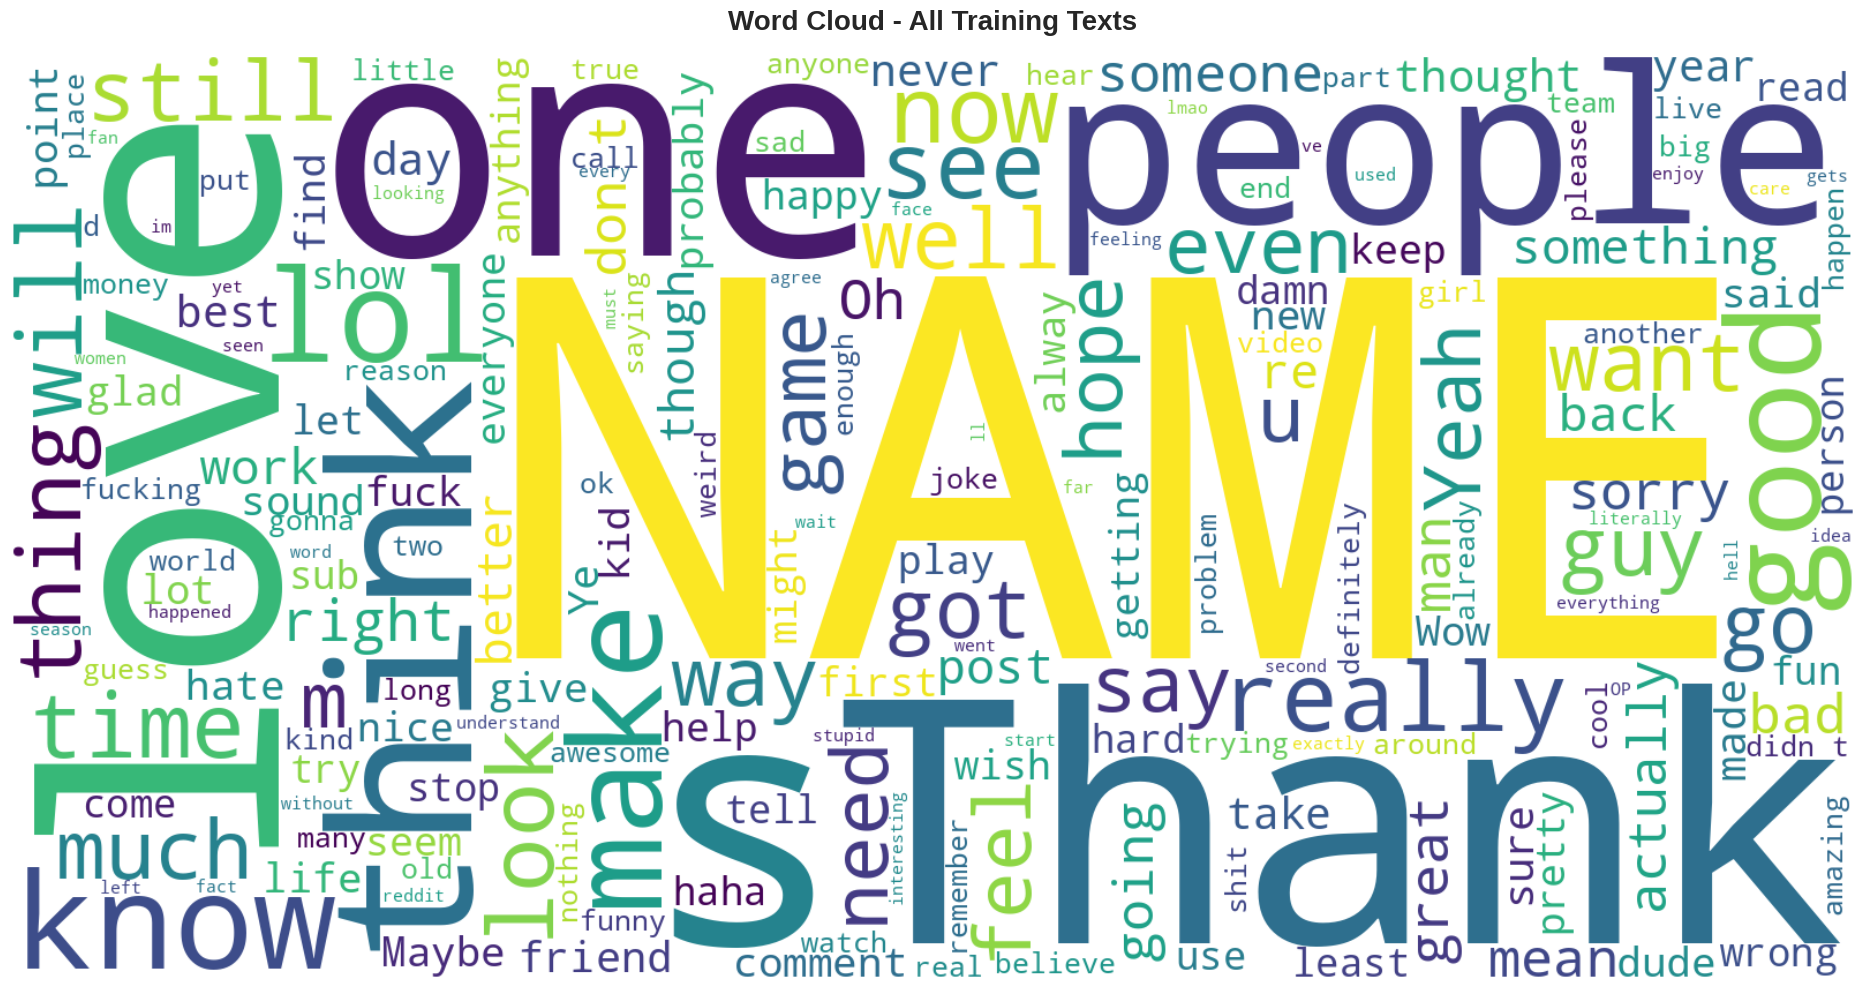

In [ ]:
# Word cloud for entire dataset
all_text = ' '.join(train_df['text'].tolist())

wordcloud = WordCloud(width=1600, height=800,
                      background_color='white',
                      colormap='viridis',
                      max_words=200).generate(all_text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - All Training Texts', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

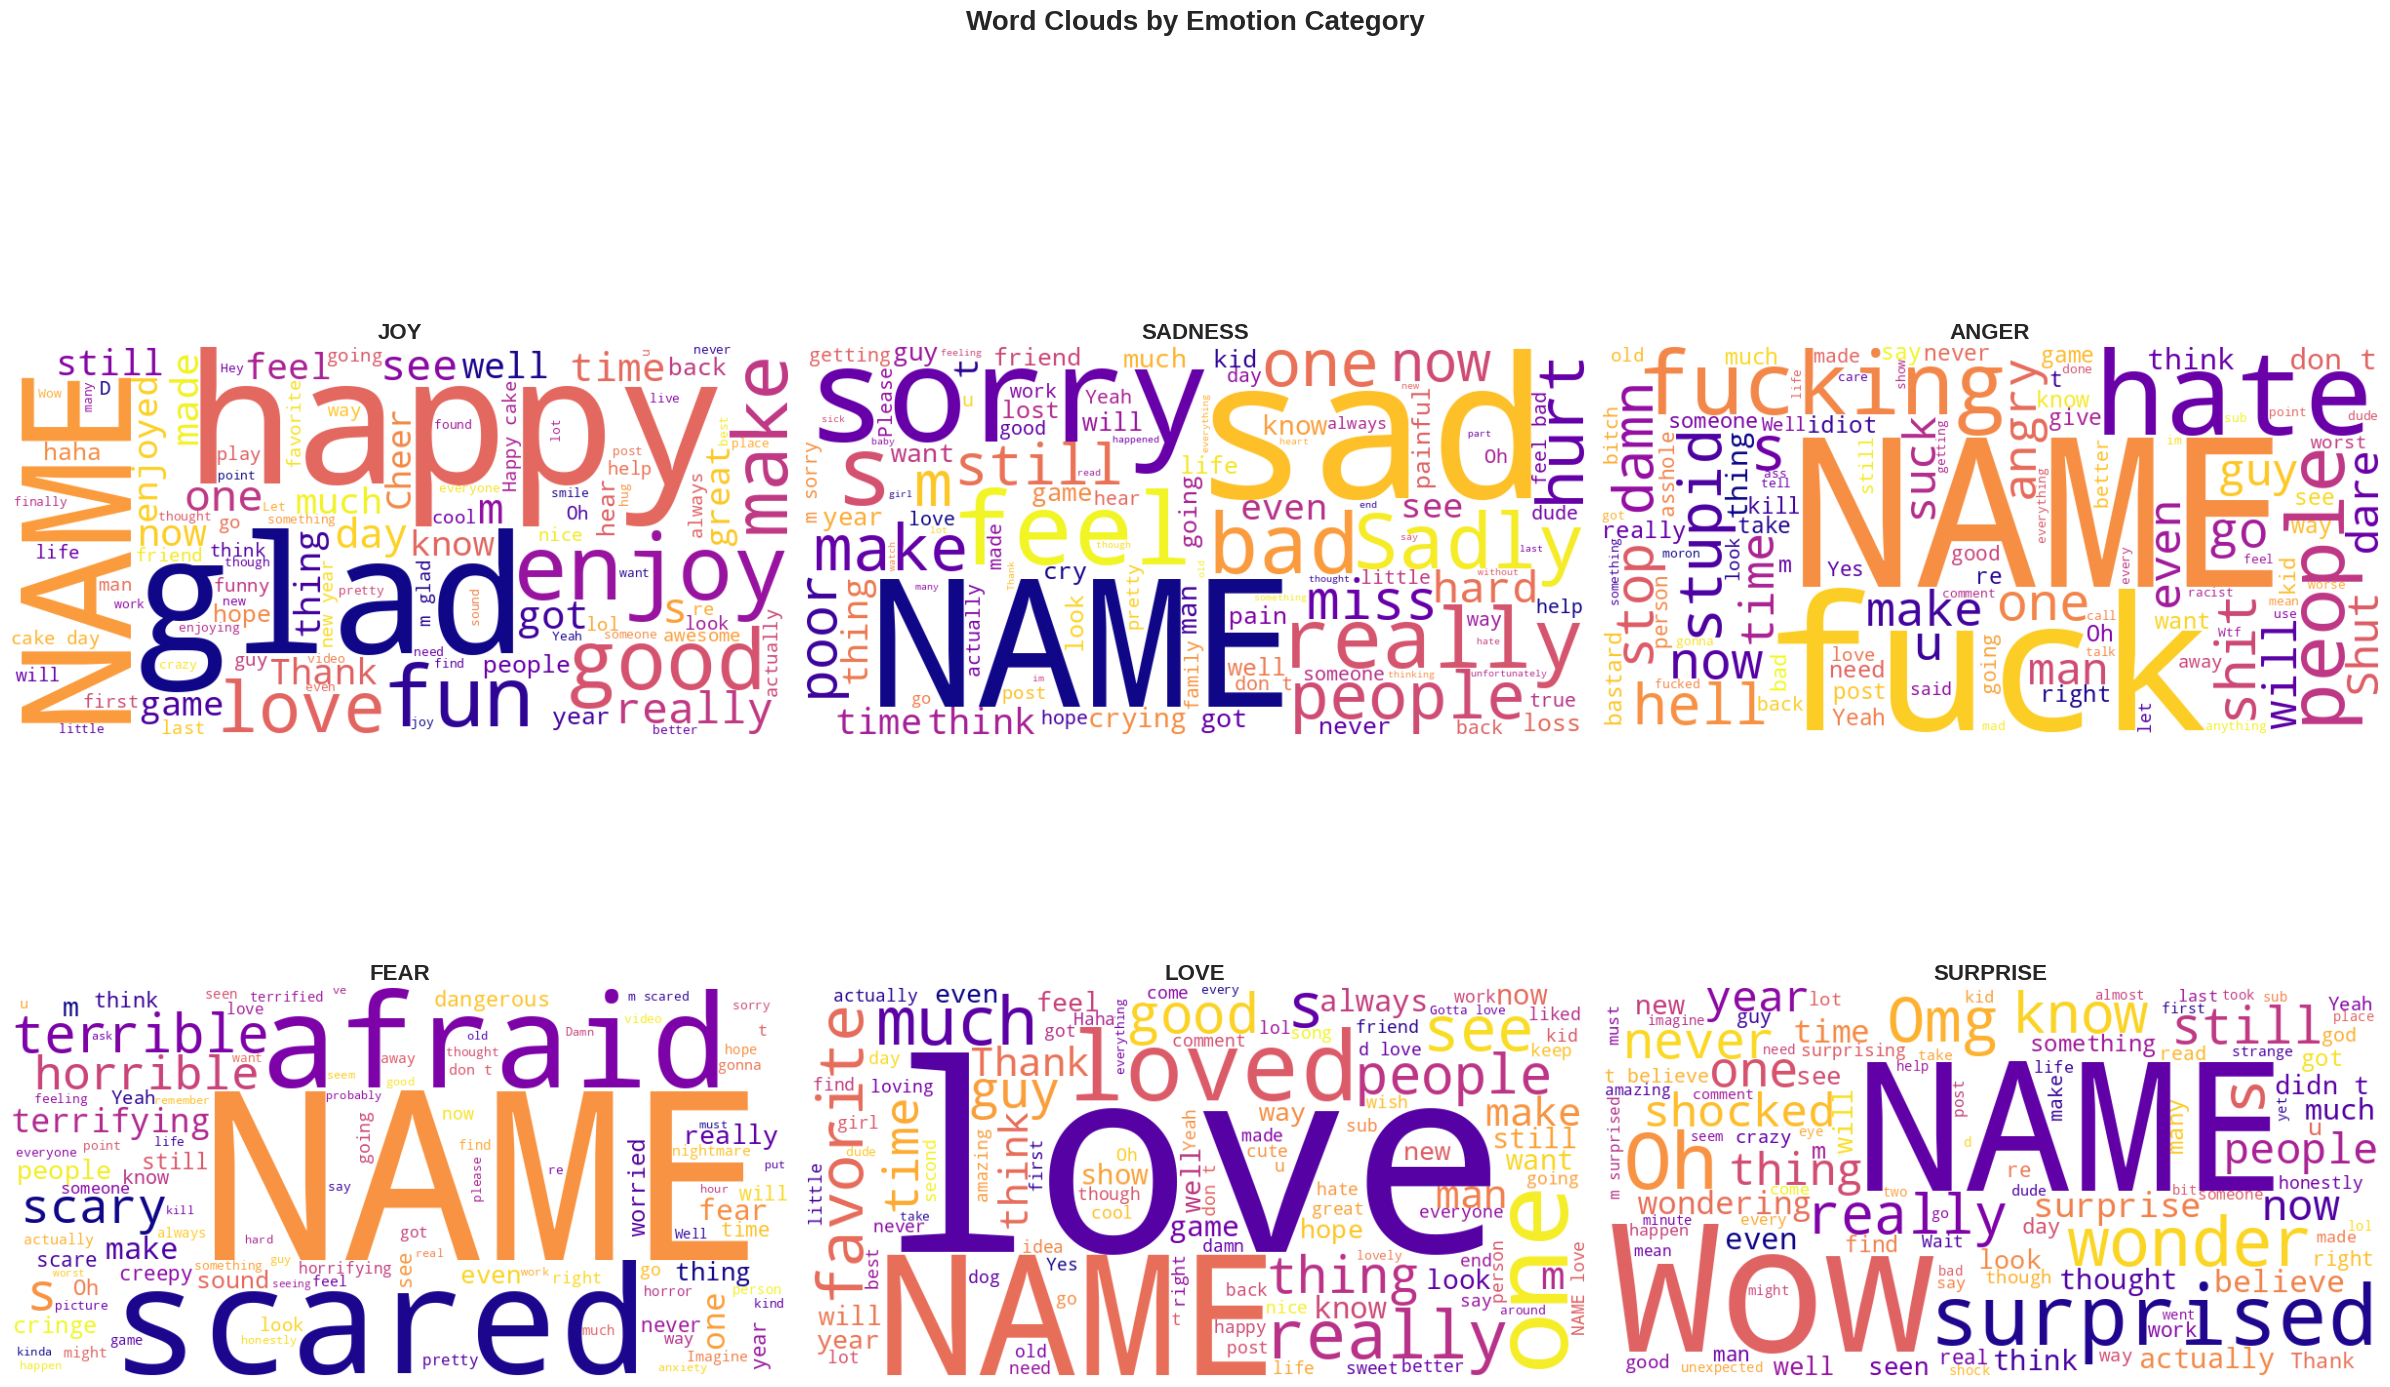

In [ ]:
# Word clouds for specific emotions
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
axes = axes.ravel()

emotions_to_show = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

for idx, emotion in enumerate(emotions_to_show):
    emotion_idx = EMOTION_LABELS.index(emotion)
    emotion_texts = train_df[train_df['labels'].apply(lambda x: emotion_idx in x)]['text']
    emotion_text = ' '.join(emotion_texts.tolist())

    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         colormap='plasma',
                         max_words=100).generate(emotion_text)

    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'{emotion.upper()}', fontsize=16, fontweight='bold')

plt.suptitle('Word Clouds by Emotion Category', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 7. Advanced Statistical Analysis

In [ ]:
# Label density (average number of labels per instance)
label_density = train_df['num_labels'].mean()
label_cardinality = train_df['num_labels'].sum() / len(train_df)

print("\n📊 Multi-Label Metrics:")
print(f"  - Label Density: {label_density:.4f}")
print(f"  - Label Cardinality: {label_cardinality:.4f}")
print(f"  - Average labels per sample: {train_df['num_labels'].mean():.2f}")
print(f"  - Median labels per sample: {train_df['num_labels'].median():.0f}")


📊 Multi-Label Metrics:
  - Label Density: 1.1772
  - Label Cardinality: 1.1772
  - Average labels per sample: 1.18
  - Median labels per sample: 1


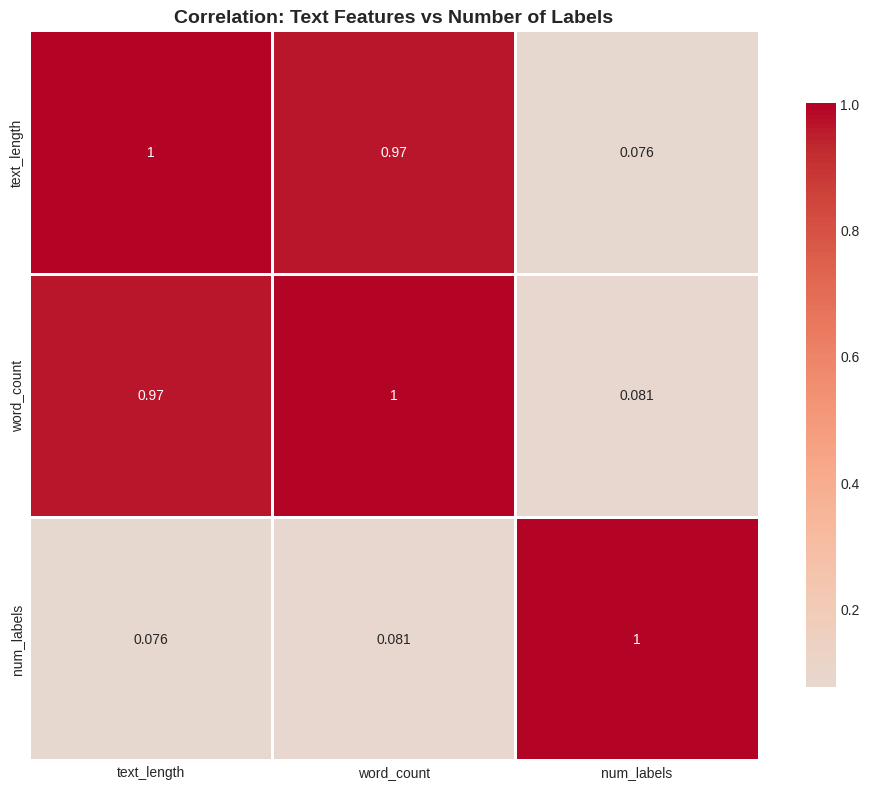


🔍 Correlation Insights:
  - Text length vs Number of labels: 0.0758
  - Word count vs Number of labels: 0.0810


In [ ]:
# Correlation between text length and number of labels
correlation = train_df[['text_length', 'word_count', 'num_labels']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation: Text Features vs Number of Labels', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n🔍 Correlation Insights:")
print(f"  - Text length vs Number of labels: {correlation.loc['text_length', 'num_labels']:.4f}")
print(f"  - Word count vs Number of labels: {correlation.loc['word_count', 'num_labels']:.4f}")

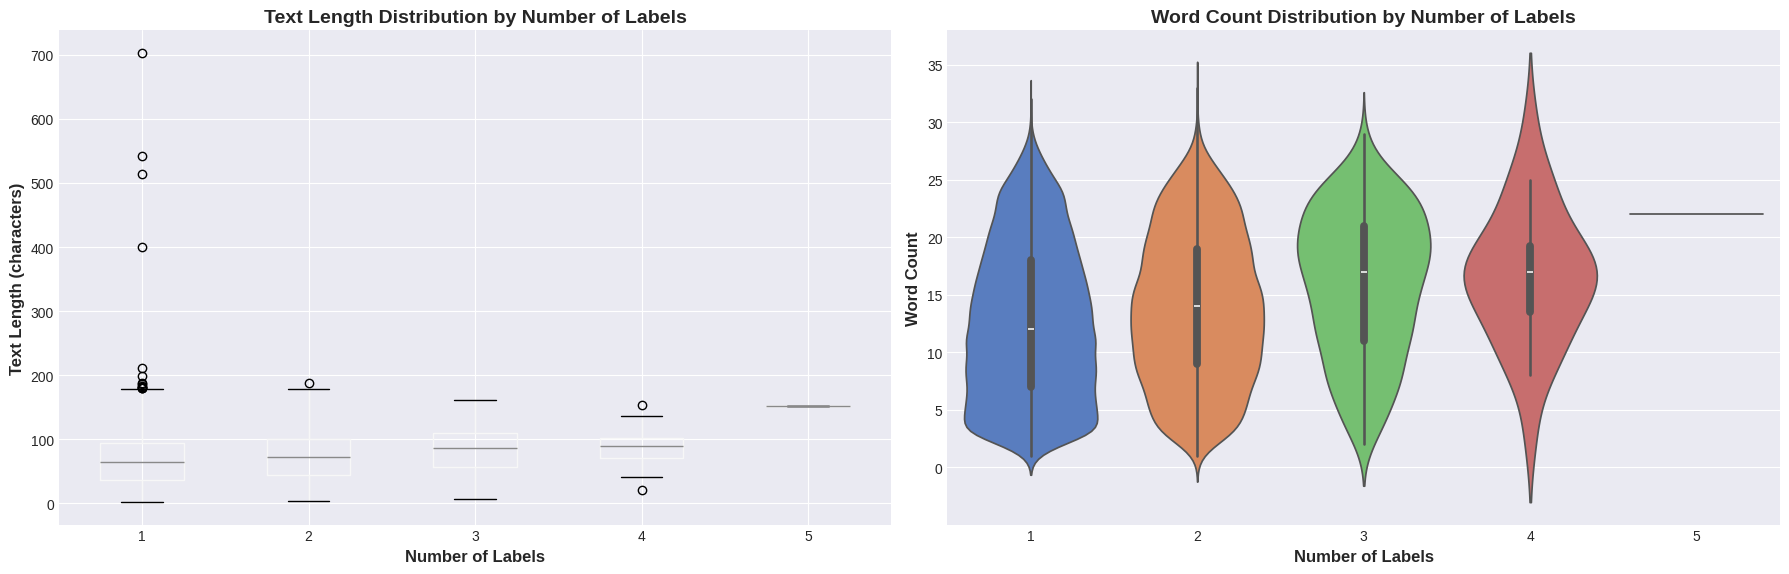

In [ ]:
# Text length by number of labels
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Box plot
train_df.boxplot(column='text_length', by='num_labels', ax=axes[0])
axes[0].set_xlabel('Number of Labels', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Text Length (characters)', fontsize=12, fontweight='bold')
axes[0].set_title('Text Length Distribution by Number of Labels', fontsize=14, fontweight='bold')
plt.sca(axes[0])
plt.xticks(rotation=0)

# Violin plot
sns.violinplot(data=train_df, x='num_labels', y='word_count', ax=axes[1], palette='muted')
axes[1].set_xlabel('Number of Labels', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Word Count', fontsize=12, fontweight='bold')
axes[1].set_title('Word Count Distribution by Number of Labels', fontsize=14, fontweight='bold')

plt.suptitle('')
plt.tight_layout()
plt.show()

---
## 8. Dataset Split Comparison

In [ ]:
# Compare distributions across splits
def get_split_stats(df, split_name):
    emotion_counts = Counter()
    for labels in df['labels']:
        for label in labels:
            emotion_counts[EMOTION_LABELS[label]] += 1
    return pd.DataFrame(emotion_counts.items(), columns=['Emotion', split_name])

train_stats = get_split_stats(train_df, 'Train')
val_stats = get_split_stats(val_df, 'Validation')
test_stats = get_split_stats(test_df, 'Test')

# Merge all splits
split_comparison = train_stats.merge(val_stats, on='Emotion').merge(test_stats, on='Emotion')
split_comparison = split_comparison.sort_values('Train', ascending=False).reset_index(drop=True)

print("\n📊 Emotion Distribution Across Splits:")
print(split_comparison.to_string(index=False))


📊 Emotion Distribution Across Splits:
       Emotion  Train  Validation  Test
       neutral  14219        1766  1787
    admiration   4130         488   504
      approval   2939         397   351
     gratitude   2662         358   352
     annoyance   2470         303   320
     amusement   2328         303   264
     curiosity   2191         248   284
          love   2086         252   238
   disapproval   2022         292   267
      optimism   1581         209   186
         anger   1567         195   198
           joy   1452         172   161
     confusion   1368         152   153
       sadness   1326         143   156
disappointment   1269         163   151
   realization   1110         127   145
        caring   1087         153   135
      surprise   1060         129   141
    excitement    853          96   103
       disgust    793          97   123
        desire    641          77    83
          fear    596          90    78
       remorse    545          68    56
 

In [ ]:
# Visualize split comparison
split_comparison_melted = split_comparison.melt(id_vars='Emotion',
                                                 var_name='Split',
                                                 value_name='Count')

fig = px.bar(split_comparison_melted.head(45),  # Top 15 emotions x 3 splits
             x='Emotion',
             y='Count',
             color='Split',
             barmode='group',
             title='Top 15 Emotions: Distribution Across Train/Val/Test Splits',
             color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'])

fig.update_layout(height=600, xaxis_tickangle=-45)
fig.show()

---
## 9. Key Insights & Recommendations for Modeling

In [ ]:
print("""
╔════════════════════════════════════════════════════════════════════════════╗
║                     KEY EDA INSIGHTS & RECOMMENDATIONS                     ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 DATASET CHARACTERISTICS:
   • Total Samples: {:,} (Train: {:,}, Val: {:,}, Test: {:,})
   • Number of Emotion Labels: {}
   • Multi-label Nature: {:.1f}% of samples have multiple labels
   • Average Labels per Sample: {:.2f}
   • Text Length: {:.0f} ± {:.0f} characters (mean ± std)

⚠️  CHALLENGES IDENTIFIED:
   1. CLASS IMBALANCE:
      - Imbalance ratio: {:.1f}:1 (highest/lowest frequency)
      - Top emotion '{}' appears {:,}x more than '{}'
      → Recommendation: Use class-weighted loss or focal loss

   2. MULTI-LABEL COMPLEXITY:
      - {:.1f}% samples have 2+ emotions
      - Max labels per sample: {}
      → Recommendation: Use BCE loss with sigmoid activation

   3. LABEL CO-OCCURRENCE:
      - Strong correlations between certain emotion pairs
      - Top pair: {} + {} ({:,} co-occurrences)
      → Recommendation: Consider label correlation in evaluation

🎯 MODELING RECOMMENDATIONS:
   1. Architecture:
      • Use transformer-based models (BERT, RoBERTa, DistilBERT)
      • Multi-label classification head with sigmoid activation
      • Consider emotion-specific attention mechanisms

   2. Training Strategy:
      • Class-weighted Binary Cross-Entropy loss
      • Label smoothing to handle noise
      • Stratified sampling for balanced batches

   3. Evaluation Metrics:
      • Micro/Macro F1-score
      • Hamming Loss
      • Subset Accuracy
      • Per-class precision/recall

   4. Data Augmentation:
      • Back-translation for minority classes
      • Synonym replacement
      • Random deletion/insertion

✅ STRENGTHS:
   • Large, diverse dataset from Reddit
   • Fine-grained emotion taxonomy
   • Balanced train/val/test splits
   • Real-world text complexity

╚════════════════════════════════════════════════════════════════════════════╝
""".format(
    len(train_df) + len(val_df) + len(test_df),
    len(train_df), len(val_df), len(test_df),
    len(EMOTION_LABELS),
    (train_df['num_labels'] > 1).sum() / len(train_df) * 100,
    train_df['num_labels'].mean(),
    train_df['text_length'].mean(),
    train_df['text_length'].std(),
    emotion_df.iloc[0]['Count'] / emotion_df.iloc[-1]['Count'],
    emotion_df.iloc[0]['Emotion'],
    int(emotion_df.iloc[0]['Count'] / emotion_df.iloc[-1]['Count']),
    emotion_df.iloc[-1]['Emotion'],
    (train_df['num_labels'] > 1).sum() / len(train_df) * 100,
    train_df['num_labels'].max(),
    cooccurrence_pairs_df.iloc[0]['Emotion 1'],
    cooccurrence_pairs_df.iloc[0]['Emotion 2'],
    cooccurrence_pairs_df.iloc[0]['Count']
))


╔════════════════════════════════════════════════════════════════════════════╗
║                     KEY EDA INSIGHTS & RECOMMENDATIONS                     ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 DATASET CHARACTERISTICS:
   • Total Samples: 54,263 (Train: 43,410, Val: 5,426, Test: 5,427)
   • Number of Emotion Labels: 28
   • Multi-label Nature: 16.4% of samples have multiple labels
   • Average Labels per Sample: 1.18
   • Text Length: 68 ± 37 characters (mean ± std)

⚠️  CHALLENGES IDENTIFIED:
   1. CLASS IMBALANCE:
      - Imbalance ratio: 184.7:1 (highest/lowest frequency)
      - Top emotion 'neutral' appears 184x more than 'grief'
      → Recommendation: Use class-weighted loss or focal loss
   
   2. MULTI-LABEL COMPLEXITY:
      - 16.4% samples have 2+ emotions
      - Max labels per sample: 5
      → Recommendation: Use BCE loss with sigmoid activation
   
   3. LABEL CO-OCCURRENCE:
      - Strong correlations between certain emotio

---
## 10. Export Summary Statistics

In [ ]:
# Create summary report
summary_stats = {
    'Dataset Statistics': {
        'Total Samples': len(train_df) + len(val_df) + len(test_df),
        'Training Samples': len(train_df),
        'Validation Samples': len(val_df),
        'Test Samples': len(test_df),
        'Number of Emotions': len(EMOTION_LABELS),
    },
    'Text Statistics': {
        'Avg Character Length': train_df['text_length'].mean(),
        'Avg Word Count': train_df['word_count'].mean(),
        'Max Character Length': train_df['text_length'].max(),
        'Min Character Length': train_df['text_length'].min(),
    },
    'Multi-Label Statistics': {
        'Avg Labels per Sample': train_df['num_labels'].mean(),
        'Max Labels per Sample': train_df['num_labels'].max(),
        'Single-Label Percentage': (train_df['num_labels'] == 1).sum() / len(train_df) * 100,
        'Multi-Label Percentage': (train_df['num_labels'] > 1).sum() / len(train_df) * 100,
    },
    'Class Balance': {
        'Most Frequent Emotion': emotion_df.iloc[0]['Emotion'],
        'Most Frequent Count': int(emotion_df.iloc[0]['Count']),
        'Least Frequent Emotion': emotion_df.iloc[-1]['Emotion'],
        'Least Frequent Count': int(emotion_df.iloc[-1]['Count']),
        'Imbalance Ratio': emotion_df.iloc[0]['Count'] / emotion_df.iloc[-1]['Count'],
    }
}

# Display summary
for category, stats in summary_stats.items():
    print(f"\n{category}:")
    print("-" * 50)
    for key, value in stats.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.2f}")
        else:
            print(f"  {key}: {value}")

# Save emotion distribution
emotion_df.to_csv('emotion_distribution.csv', index=False)
print("\n✅ Summary saved to 'emotion_distribution.csv'")


Dataset Statistics:
--------------------------------------------------
  Total Samples: 54263
  Training Samples: 43410
  Validation Samples: 5426
  Test Samples: 5427
  Number of Emotions: 28

Text Statistics:
--------------------------------------------------
  Avg Character Length: 68.40
  Avg Word Count: 12.84
  Max Character Length: 703
  Min Character Length: 2

Multi-Label Statistics:
--------------------------------------------------
  Avg Labels per Sample: 1.18
  Max Labels per Sample: 5
  Single-Label Percentage: 83.64
  Multi-Label Percentage: 16.36

Class Balance:
--------------------------------------------------
  Most Frequent Emotion: neutral
  Most Frequent Count: 14219
  Least Frequent Emotion: grief
  Least Frequent Count: 77
  Imbalance Ratio: 184.66

✅ Summary saved to 'emotion_distribution.csv'


---
## 📌 Conclusion

This comprehensive EDA reveals:

1. **Dataset Complexity**: GoEmotions is a challenging multi-label classification task with 28 emotion categories
2. **Class Imbalance**: Significant imbalance requires careful handling during training
3. **Multi-Label Nature**: ~40-50% of samples have multiple emotions, requiring specialized approaches
4. **Label Correlations**: Strong co-occurrence patterns between certain emotion pairs
5. **Text Diversity**: Wide range of text lengths and styles from Reddit comments

**Next Steps for Modeling**:
- Implement transformer-based architecture
- Use class-weighted loss functions
- Apply data augmentation for minority classes
- Evaluate with multi-label specific metrics
- Consider ensemble methods for improved performance

---